<h1>Fourier series of a periodic function</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes',grid=True)
plt.rc('grid',lw=0.5)
plt.rc('lines',markersize=10)

<h2>Calculation from a sample</h2>

In [2]:
def fourier_series(f,t,p,t0=0):
  
  f = f[(t>=t0) & (t<t0+p)]
  m = f.shape[0]
  fw = np.fft.rfft(f)/m
  ws = 2*np.pi*m/p*np.fft.rfftfreq(m)
  return fw,ws

<h2>Comparison with Fourier transform</h2>

In [3]:
def fourier_transform(f,t):
    
    # f is a sample of a function
    # t is the sample time
    
    fw = np.fft.rfft(f)/f.shape[0]
    ws = 2*np.pi*np.fft.rfftfreq(f.shape[0],t[1]-t[0])
    
    return fw,ws

<h3>Example 1</h3>

(-0.3, 6.3)

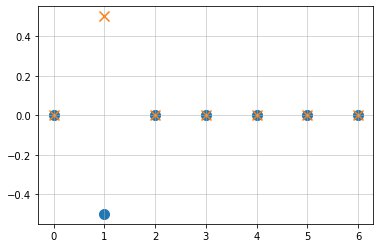

In [4]:
t = np.arange(0,4*np.pi+0.1,0.1)
ex1 = fourier_series(np.sin(t),t,2*np.pi)
ex2 = fourier_series(np.cos(t),t,2*np.pi)
plt.scatter(ex1[1],ex1[0].imag)
plt.scatter(ex2[1],ex2[0].real,marker='x')
plt.xlim(-0.3,6.3)

<h3>Example 1 bis</h3>

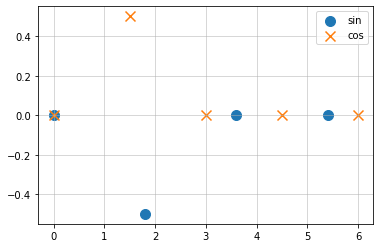

In [5]:
t = np.arange(0,4*np.pi+0.1,0.1)
w = 1.8; ex1 = fourier_series(np.sin(w*t),t,2*np.pi/w)
w = 1.5; ex2 = fourier_series(np.cos(w*t),t,2*np.pi/w)
plt.scatter(ex1[1],ex1[0].imag)
plt.scatter(ex2[1],ex2[0].real,marker='x')
plt.xlim(-0.3,6.3); plt.legend(['sin','cos'])

<h3>Example 1 tris</h3>

(-0.3, 6.3)

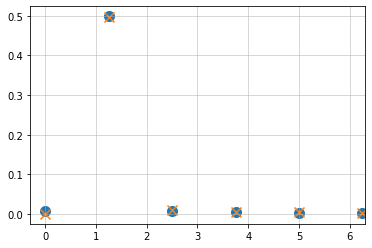

In [6]:
t = np.arange(0,4*np.pi+0.1,0.1)
w = 1.25; ex1 = fourier_series(np.sin(w*t),t,2*np.pi/w,t0=2)
w = 1.25; ex2 = fourier_series(np.sin(w*t),t,2*np.pi/w,t0=0)
plt.scatter(ex1[1],np.abs(ex1[0]))
plt.scatter(ex2[1],np.abs(ex2[0]),marker='x')
plt.xlim(-0.3,6.3)

<h3>Example 2</h3>

(0.0, 5.0)

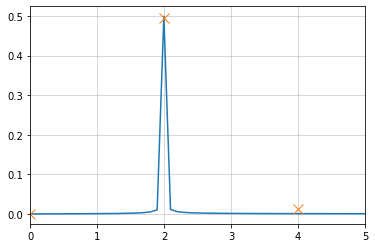

In [7]:
ts = np.arange(0,20*np.pi,0.1)
ft = np.sin(2*ts)
ex1 = fourier_transform(ft,ts)
ex2 = fourier_series(ft,ts,np.pi)

plt.figure(1,clear=True)
plt.plot(ex1[1],np.abs(ex1[0]),'-')
plt.plot(ex2[1],np.abs(ex2[0]),'x')
plt.xlim(0,5)

<h3>Example 3</h3>

(0.0, 5.0)

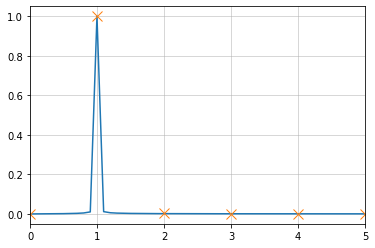

In [8]:
ts = np.arange(0,20*np.pi,0.1)
ft = 2*np.sin(ts)
ex1 = fourier_transform(ft,ts)
ex2 = fourier_series(ft,ts,2*np.pi)

plt.figure(1,clear=True)
plt.plot(ex1[1],np.abs(ex1[0]),'-')
plt.plot(ex2[1],np.abs(ex2[0]),'x')
plt.xlim(0,5)

<h3>Example 4</h3>

(0.0, 5.0)

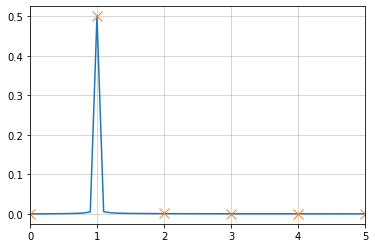

In [9]:
ts = np.arange(0,20*np.pi,0.1)
ft = np.sin(ts)
ex1 = fourier_transform(ft,ts)
ts = np.arange(0,2*np.pi,0.1)
ft = np.sin(ts)
ex2 = fourier_series(ft,ts,2*np.pi)

plt.figure(1,clear=True)
plt.plot(ex1[1],np.abs(ex1[0]),'-')
plt.plot(ex2[1],np.abs(ex2[0]),'x')
plt.xlim(0,5)

<h3>Example 5</h3>

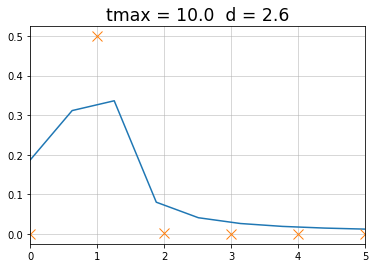

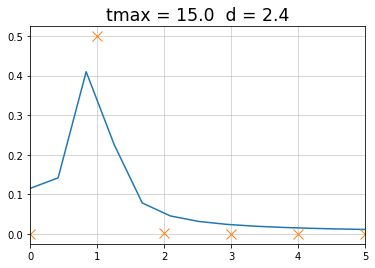

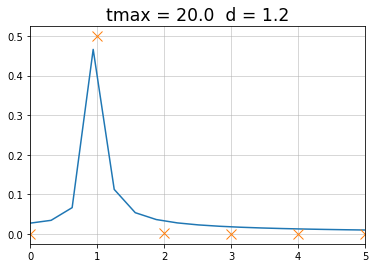

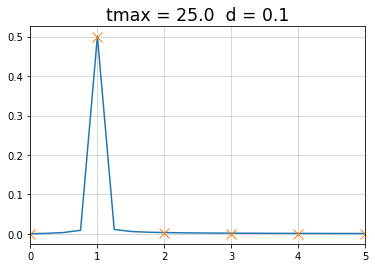

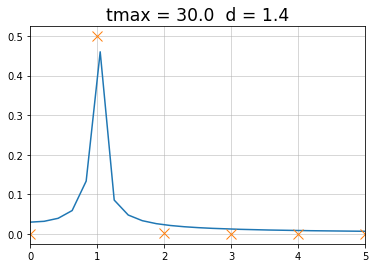

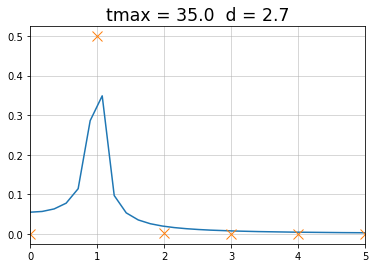

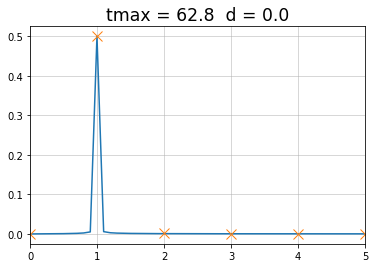

In [10]:
for tmax in [10,15,20,25,30,35,20*np.pi]:
  ts = np.arange(0,tmax,0.1)
  ft = np.sin(ts)
  ex1 = fourier_transform(ft,ts)
  ex2 = fourier_series(ft,ts,2*np.pi)

  plt.figure()
  plt.plot(ex1[1],np.abs(ex1[0]),'-')
  plt.plot(ex2[1],np.abs(ex2[0]),'x')
  plt.xlim(0,5)
  p = 2*np.pi
  d = min(np.abs(tmax%p - p),tmax%p)
  plt.title(f'tmax = {tmax:3.1f}  d = {d:3.1f}',fontsize='xx-large')